In [ ]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1) (1).json


{'kaggle (1) (1).json': b'{"username":"robertbr97","key":"38b8a4357adebdbfb08e956dc2afb974"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp "kaggle (1).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 873MB/s]


In [ ]:

import pandas as pd
import zipfile


with zipfile.ZipFile("udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip", 'r') as zip_ref:
    zip_ref.extractall("./")


train_df = pd.read_csv('train.csv')

In [ ]:
train_df.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [ ]:
print(train_df.columns.tolist())


['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD', 'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL', 'coef_1', 'coef_2', 'coef_3', 'coef_4']


In [ ]:
# Variables predictoras (puedes incluir opcionales si lo deseas)
features = [
    'PERIODO',
    'ESTU_PRGM_ACADEMICO',
    'ESTU_PRGM_DEPARTAMENTO',
    'ESTU_VALORMATRICULAUNIVERSIDAD',
    'ESTU_HORASSEMANATRABAJA',
    'FAMI_ESTRATOVIVIENDA',
    'FAMI_TIENEINTERNET',
    'FAMI_EDUCACIONPADRE',
    'FAMI_EDUCACIONMADRE',
    'FAMI_TIENECOMPUTADOR',
    'ESTU_PAGOMATRICULAPROPIO'
]

target = 'RENDIMIENTO_GLOBAL'

# Filtrar solo esas columnas y eliminar valores nulos
train_df = train_df[features + [target]].dropna()

In [ ]:
train_df.head()


,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TIENECOMPUTADOR,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,Si,No,medio-alto
1,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,Si,No,bajo
2,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,No,bajo
3,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,Si,No,alto
4,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,Si,No,medio-bajo


In [ ]:
# One-hot encoding para X
X = pd.get_dummies(train_df[features])

# Variable objetivo (asegurar tipo categoría)
y = train_df[target].astype('category')


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'  # útil si las clases están desbalanceadas
)
clf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

Reporte de clasificación:
              precision    recall  f1-score   support

        alto       0.52      0.58      0.55     32740
        bajo       0.41      0.46      0.43     30888
  medio-alto       0.30      0.26      0.28     31755
  medio-bajo       0.31      0.27      0.29     31765

    accuracy                           0.39    127148
   macro avg       0.38      0.39      0.39    127148
weighted avg       0.38      0.39      0.39    127148



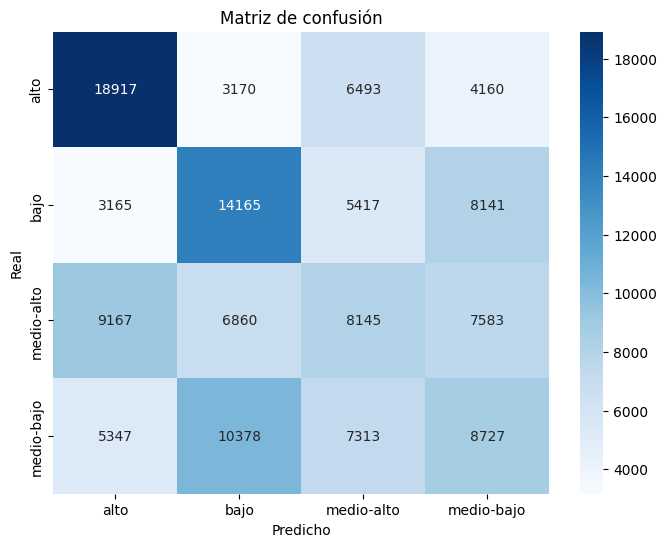

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

labels = y.cat.categories
cm = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de confusión")
plt.show()


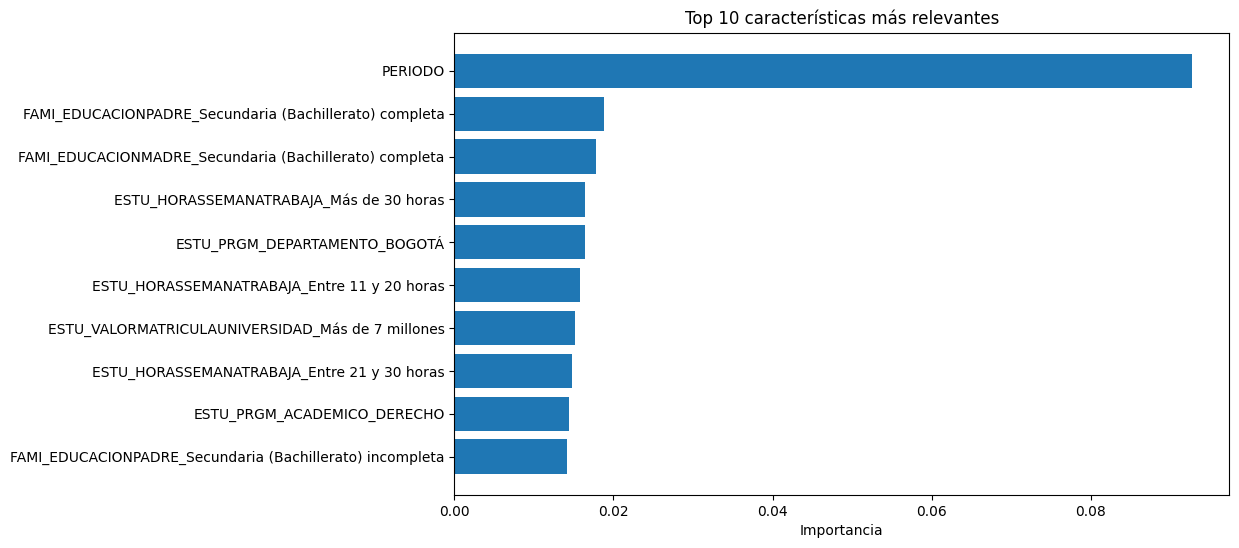

In [ ]:
importances = clf.feature_importances_
feat_names = X.columns

# Mostrar las 10 más importantes
indices = importances.argsort()[-10:][::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feat_names[i] for i in indices])
plt.xlabel("Importancia")
plt.title("Top 10 características más relevantes")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# Leer archivo con datos de prueba
test_df = pd.read_csv("test.csv")  # Usa el nombre real del archivo
# Guardar los IDs para la salida final
ids = test_df["ID"]
# Preprocesar igual que en entrenamiento (mismas columnas)
X_test = pd.get_dummies(test_df[features])
# Asegurar que las columnas coincidan con las del entrenamiento
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]  # Reordenar columnas
# Hacer predicciones
y_pred = clf.predict(X_test)
# Crear submission
submission = pd.DataFrame({
    "ID": ids,
    "RENDIMIENTO_GLOBAL": y_pred
})
# Guardar como CSV
submission.to_csv("submission.csv", index=False)


In [ ]:
submission.head()


,ID,RENDIMIENTO_GLOBAL
0,550236,alto
1,98545,medio-bajo
2,499179,alto
3,782980,bajo
4,785185,bajo


In [ ]:
from google.colab import files
files.download("submission.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RANDOM FOREST